In [27]:
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")

In [28]:
# function to load the simulation data from the json file
def load_config(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

In [29]:
config = load_config('simulation_data.json')

# Convert the json file data into a pandas DataFrame
df = pd.DataFrame(config)
df.head()



,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.575996,0.251746,0.346584,0.346963,0.257633,0.245614,0.223875,0.281646,0.297203,0.347824,...,0.357161,0.292850,0.417887,0.498829,0.588469,0.185850,0.420876,0.391373,0.401556,0.441739
1,0.159116,0.302615,0.367366,0.428498,0.332784,0.320413,0.540536,0.329171,0.426432,0.347284,...,0.251399,0.506466,0.195861,0.108061,0.300194,0.630334,0.415189,0.319785,0.236625,0.520127
2,0.299811,0.386840,0.401505,0.181035,0.349370,0.224524,0.519703,0.209751,0.444073,0.000000,...,0.226962,0.254600,0.084386,0.325102,0.390924,0.516312,0.274171,0.275813,0.184822,0.837511
3,0.331743,0.282630,0.241947,0.537960,0.551484,0.239924,0.350939,0.445399,0.484512,0.324156,...,0.347704,0.306924,0.487864,0.395604,0.136653,0.346288,0.041358,0.403380,0.258721,0.605726
4,0.387708,0.107185,0.100162,0.226093,0.425673,0.341025,0.060977,0.552021,0.210914,0.384988,...,0.428287,0.247491,0.560180,0.481734,0.320084,0.195502,0.390366,0.381033,0.400554,0.332576


In [35]:
# The following plot shows the waiting times for all the festival goers for each number of servers in the system

df_melted = pd.melt(df, value_name="Waiting Time", ignore_index=False)
# sns.scatterplot(data=df_melted, x=df_melted.index, y="Waiting Time")
df.index = df.index + 1 # this switches the x-axis labels to strat from 1 instead of 0



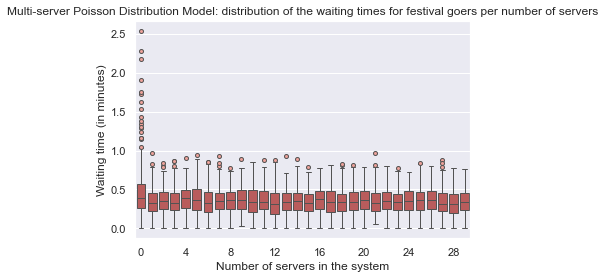

In [31]:
ax = sns.boxplot(data=df_melted, x=df_melted.index, y="Waiting Time", color="#c94c4c",  flierprops=dict( marker='o', markersize=4, markerfacecolor="#eea29a"))


xticks_interval = 4
labels = ax.get_xticks()[::xticks_interval] 
ax.set_xticks(labels)

plt.title("Multi-server Normal Distribution Model: distribution of the waiting times for festival goers per number of servers")
#plt.title("Distribution of Waiting Times for Festival Goers Generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

<Figure size 720x432 with 0 Axes>

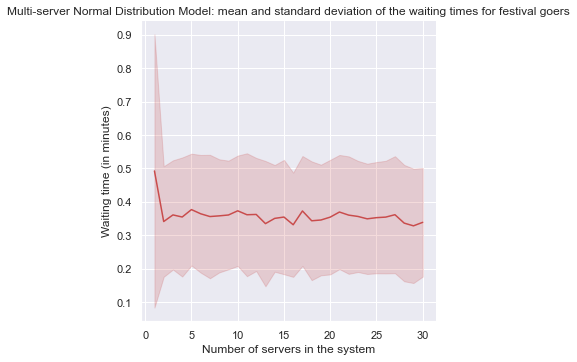

In [36]:
plt.figure(figsize=(10, 6))
sns.relplot(x=df_melted.index, y="Waiting Time", 
             data=df_melted, kind="line", errorbar="sd", color="#c94c4c") #color="#034f84") HOW MANY STANDARD DEVIATIONS -> ONE FROM THE MEAN

plt.title("Multi-server Normal Distribution Model: mean and standard deviation of the waiting times for festival goers")
#plt.title("Distribution of Waiting Times for Festival Goers generated by the Normal Distribution Model")
plt.xlabel("Number of servers in the system")
plt.ylabel("Waiting time (in minutes)")
plt.show()

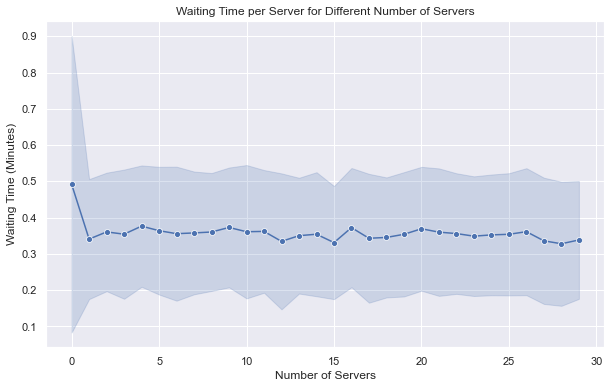

In [33]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=df_melted.index, y='Waiting Time', data=df_melted, marker='o', errorbar="sd")
plt.title("Waiting Time per Server for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time (Minutes)")
plt.show()

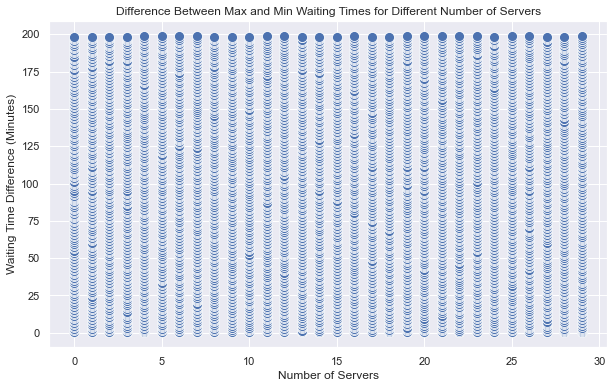

In [34]:
waiting_time_diff = df_melted.max(axis=1) - df_melted.min(axis=1)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_melted.index, y=waiting_time_diff, s=100)
#sns.scatterplot(x=range(1, len(waiting_time_diff)+1), y=waiting_time_diff, color='skyblue', s=100)
plt.title("Difference Between Max and Min Waiting Times for Different Number of Servers")
plt.xlabel("Number of Servers")
plt.ylabel("Waiting Time Difference (Minutes)")
#plt.xticks(range(1, len(waiting_time_diff)+1))  # Set x-axis ticks to actual number of servers
plt.show()